# Task 1
## Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline





# load the data frame from csv file to pandas datframe

In [2]:
t_data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# learning about the data set

In [4]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
t_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
t_data.shape

(891, 12)

In [7]:
t_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# we need to handle missing values 


In [9]:
# to handle missing values in the cabin column we will drop it as they are numerous

In [10]:
t_data.drop(columns='Cabin', axis=1, inplace=True)

In [11]:
# to handle missing values in the age and fare column we will replace them with the mean age and fare

In [12]:
Age = t_data['Age'].mean()

In [13]:
t_data['Age'].fillna(Age, inplace = True)

In [14]:
Fare = t_data['Fare'].mean()

In [15]:
t_data['Fare'].fillna(Fare, inplace = True)

In [16]:
imputer = SimpleImputer(strategy="mean")


In [17]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
# Our data is now consistent

In [19]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Data Visualization

In [20]:
sns.set()


<Axes: xlabel='Sex', ylabel='count'>

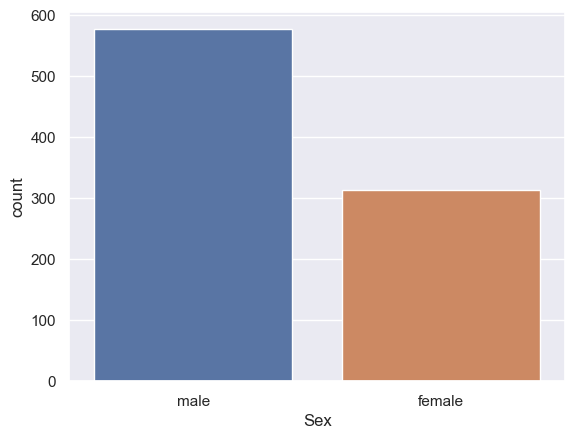

In [21]:
sns.countplot(x='Sex', data=t_data)

In [22]:
t_data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

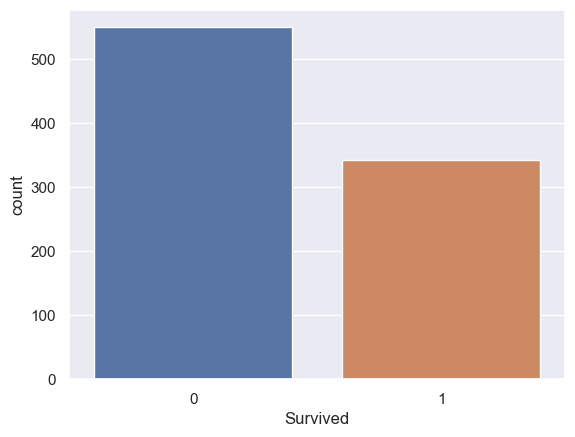

In [23]:
sns.countplot(x='Survived', data=t_data)

<Axes: xlabel='Sex', ylabel='count'>

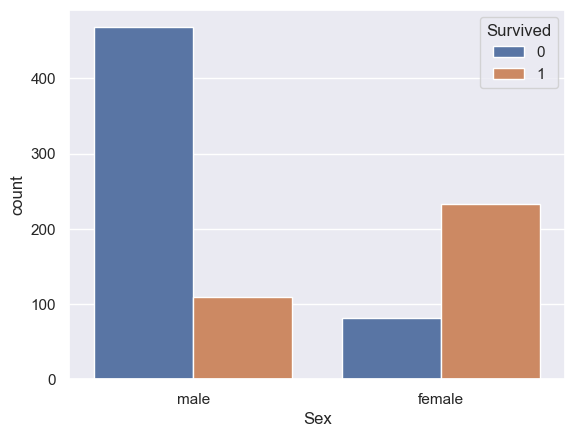

In [24]:
sns.countplot (x='Sex', hue = 'Survived', data = t_data)


# this is clearly visible that those who survived were only females

In [25]:
t_data[['Survived', 'Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [26]:
 t_data[['Survived', 'Pclass' ]]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


<Axes: xlabel='Pclass', ylabel='count'>

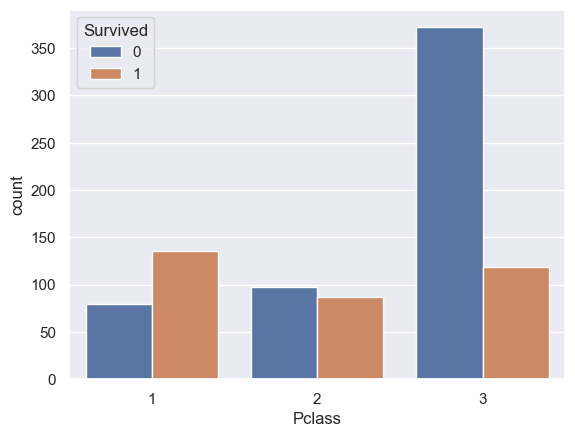

In [27]:
sns.countplot(x ='Pclass',hue= 'Survived', data=t_data)

# converting the categorical variables into numerical data

In [28]:
t_data.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [29]:
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1.0


In [30]:
# Now drop the columns which are irrelevant for the survival prediction, such as PassengerId, Name and Ticket

In [31]:
t_data.drop(columns={'PassengerId','Name','Ticket'},axis=1, inplace=True)

In [32]:
t_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0.0
887,1,1,1,19.000000,0,0,30.0000,0.0
888,0,3,1,29.699118,1,2,23.4500,0.0
889,1,1,0,26.000000,0,0,30.0000,1.0


# separating features and target

In [33]:
X = t_data.drop(columns='Survived', axis=1)
Y = t_data['Survived']


In [34]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# splitting the data into training and testing

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [36]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

# Model Training

In [37]:
# we're using logistic regression model that uses binary classification for the prediction

In [38]:
model = make_pipeline(imputer, LogisticRegression())

In [39]:
#training the model with the training data

In [40]:
model.fit(X_train,Y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

# Model Evaluation
Accuracy Score || Precision Score || Recall Score

In [41]:
X_test_prediction = model.predict(X_test)

In [42]:
# accuracy score for training data

In [43]:
# accuracy score for test data

In [44]:
print(X_test_prediction)

[1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0]


In [45]:
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy score of test data is : ',testing_data_accuracy)

Accuracy score of test data is :  0.7653631284916201


In [47]:
# precision score

In [48]:
test_data_precision = precision_score(Y_test, X_test_prediction)

In [49]:

print('test data precion is :', test_data_precision)

test data precion is : 0.676923076923077


In [50]:
# recall score

In [52]:
X_train_prediction = model.predict(X_train)

In [53]:
test_data_recall = recall_score(Y_train, X_train_prediction)

In [54]:
print('test data recall is :', test_data_recall)

test data recall is : 0.703971119133574


In [55]:
from sklearn import metrics

In [56]:
score = model.score(X_test,Y_test)
print(score)

0.7653631284916201


In [57]:
cm = metrics.confusion_matrix(Y_train, X_train_prediction)
print(cm)

[[379  56]
 [ 82 195]]


Text(0.5, 1.0, "('Accuracy Score :', 0.7653631284916201)")

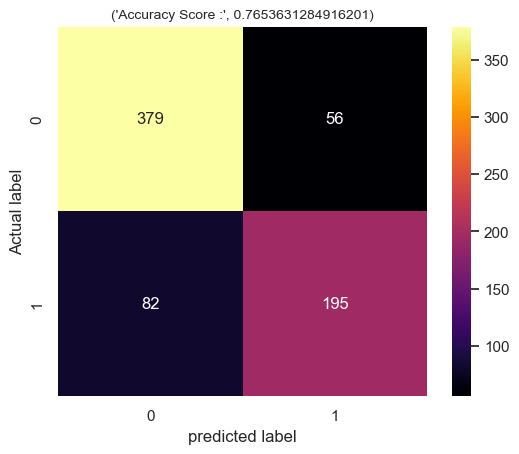

In [58]:
sns.heatmap(cm, annot = True, fmt = "d", square = True, cmap= "inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :',score)
plt.title(title, size = 10)

In [60]:
classification_report(X_test_prediction, Y_test)

'              precision    recall  f1-score   support\n\n           0       0.82      0.82      0.82       114\n           1       0.68      0.68      0.68        65\n\n    accuracy                           0.77       179\n   macro avg       0.75      0.75      0.75       179\nweighted avg       0.77      0.77      0.77       179\n'

# Model 2 
# Random Forest Classification

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model = RandomForestClassifier(n_estimators=100)

In [114]:
model= make_pipeline(imputer, RandomForestClassifier())

In [115]:
model.fit(X_train,Y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [116]:
X_test_pred = model.predict(X_test)

In [117]:
model.score(X_train, Y_train)
acc_score = round(model.score(X_test, Y_test) * 100, 2)
model_acc = accuracy_score(X_test_pred, Y_test)

In [118]:
model_acc

0.7877094972067039

In [119]:
acc_score

78.77

In [120]:
precision = precision_score(X_test_pred, Y_test)
recall = recall_score(X_test_pred, Y_test)

In [121]:
print(precision)
print(recall)

0.7230769230769231
0.7014925373134329


In [122]:
classification_report(X_test_pred, Y_test)

'              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83       112\n           1       0.72      0.70      0.71        67\n\n    accuracy                           0.79       179\n   macro avg       0.77      0.77      0.77       179\nweighted avg       0.79      0.79      0.79       179\n'

# Model 3
# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
model_3 = KNeighborsClassifier(n_neighbors=3)

In [78]:
model_3= make_pipeline(imputer, KNeighborsClassifier())

In [79]:
model_3.fit(X_train, Y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [80]:
X_test_pred = model_3.predict(X_test)

In [81]:
model_3_acc = accuracy_score(X_test_pred, Y_test, normalize=True)

In [82]:
model_3_score = round(model_3.score(X_train, Y_train) * 100, 2)

In [83]:
model_3_precision = precision_score(X_test_pred, Y_test)
model_3_recall = recall_score(X_test_pred, Y_test)

In [84]:
model_3_score

79.35

In [85]:
model_3_acc

0.6871508379888268

In [86]:
print(model_3_precision)
print(model_3_recall)

0.5230769230769231
0.576271186440678


In [87]:
classification_report(X_test_pred, Y_test)

'              precision    recall  f1-score   support\n\n           0       0.78      0.74      0.76       120\n           1       0.52      0.58      0.55        59\n\n    accuracy                           0.69       179\n   macro avg       0.65      0.66      0.65       179\nweighted avg       0.70      0.69      0.69       179\n'

# Predicting values

In [88]:
print(X) 
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [123]:
p1 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])
p2 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])
p3 = model_3.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])

C:\Users\Himani\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Himani\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Himani\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [124]:
print(p1)
print(p2)
print(p3)

[0]
[0]
[0]


In [125]:
p1 = model.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
p2 = model.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
p3 = model_3.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])

C:\Users\Himani\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Himani\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Himani\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [126]:
print(p1)
print(p2)
print(p3)

[0]
[0]
[0]


# Our prediction model is ready , and we have also predicted certain values
# We used three different models to predict our target vaiable and saw that they provided different accuracy and precision.